In [ ]:
#sheets_link = "https://docs.google.com/spreadsheets/d/1tyxACc95GD88T2Me_xhktYbc14P6-BBZkOWlT7MUaeU"

In [ ]:
!pip install "gspread==6.1.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [ ]:
import gspread
from google.oauth2.service_account import Credentials

scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

credentials = Credentials.from_service_account_file(
    '/content/my-project-response-29749ee50e47.json',
    scopes=scopes
)

gc = gspread.authorize(credentials)
sh = gc.open_by_key("1tyxACc95GD88T2Me_xhktYbc14P6-BBZkOWlT7MUaeU")

In [ ]:
import pandas as pd

worksheet = sh.sheet1 # or sh.get_worksheet(0) for the first sheet

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert to DataFrame
df_sheets = pd.DataFrame(data[1:], columns=data[0])  # First row is header

df_sheets.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,


In [ ]:
df_sheets.shape

(1566, 18)

In [ ]:
# prompt: Unique values in categorical columns (e.g., queue, type, language).

for col in ['queue', 'type', 'language']: # Replace with your actual column names
  if col in df_sheets.columns:
    print(f"Unique values in column '{col}':")
    print(df_sheets[col].unique())
  else:
    print(f"Column '{col}' not found in DataFrame.")

Unique values in column 'queue':
['Technical Support' 'Product Support' 'Sales and Pre-Sales'
 'Returns and Exchanges' 'IT Support' 'Billing and Payments'
 'Customer Service' 'Service Outages and Maintenance' 'Human Resources'
 'General Inquiry']
Unique values in column 'type':
['Incident' 'Request' 'Problem' 'Change']
Unique values in column 'language':
['en' 'de' 'pt' 'es' 'fr']


In [ ]:
# prompt: create tf-idf for 'answer' column

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df_sheets' is your DataFrame and 'answer' is the column you want to process.
if 'answer' in df_sheets.columns:
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(df_sheets['answer'])
  # Now 'tfidf_matrix' contains the TF-IDF representation of your 'answer' column.
  # You can access the feature names (words) using:
  feature_names = vectorizer.get_feature_names_out()
  # To view the matrix in a DataFrame:
  tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
  print(tfidf_df.head())
else:
  print("Column 'answer' not found in the DataFrame.")

    10   11  12345678        13   15        18  1811528  19c   20  2021  ...  \
0  0.0  0.0       0.0  0.000000  0.0  0.000000      0.0  0.0  0.0   0.0  ...   
1  0.0  0.0       0.0  0.072893  0.0  0.000000      0.0  0.0  0.0   0.0  ...   
2  0.0  0.0       0.0  0.000000  0.0  0.000000      0.0  0.0  0.0   0.0  ...   
3  0.0  0.0       0.0  0.000000  0.0  0.066198      0.0  0.0  0.0   0.0  ...   
4  0.0  0.0       0.0  0.000000  0.0  0.000000      0.0  0.0  0.0   0.0  ...   

   übersehene  übersehenes  übersicht  übertragung  überwachen  überwacht  \
0         0.0          0.0        0.0          0.0         0.0        0.0   
1         0.0          0.0        0.0          0.0         0.0        0.0   
2         0.0          0.0        0.0          0.0         0.0        0.0   
3         0.0          0.0        0.0          0.0         0.0        0.0   
4         0.0          0.0        0.0          0.0         0.0        0.0   

   überwachung  überwachungsfähigkeiten  üblichen  œuvre

In [ ]:
tfidf_df.shape

(1566, 11329)

In [ ]:
tfidf_df.head()

,10,11,12345678,13,15,18,1811528,19c,20,2021,...,übersehene,übersehenes,übersicht,übertragung,überwachen,überwacht,überwachung,überwachungsfähigkeiten,üblichen,œuvre
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.072893,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.066198,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


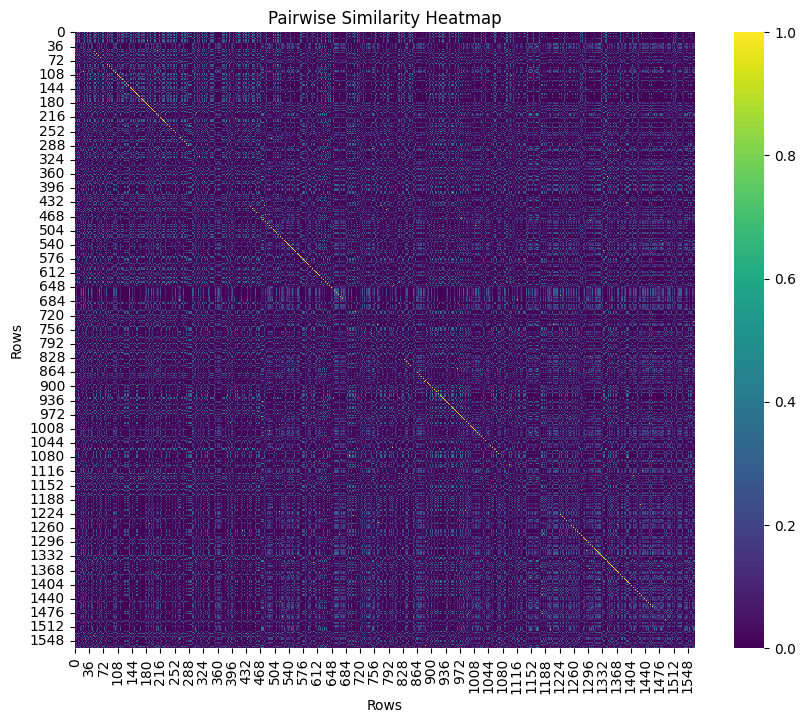

In [ ]:
# prompt: calculate pairwise similarity for every row and make a heatmap of nrows x nrows

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(tfidf_df)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(similarity_matrix, annot=False, cmap='viridis') # annot=True to show values
plt.title('Pairwise Similarity Heatmap')
plt.xlabel('Rows')
plt.ylabel('Rows')
plt.show()

In [ ]:
# prompt: use pca on 'tfidf_df' and get top 3 pca Principal Components

from sklearn.decomposition import PCA

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

print(pca_df.head())

        PC1       PC2       PC3
0 -0.165739  0.527520 -0.027509
1 -0.139883  0.460098 -0.024611
2 -0.309536 -0.203443 -0.010855
3 -0.322116 -0.211139 -0.015516
4  0.179414 -0.045781 -0.095837


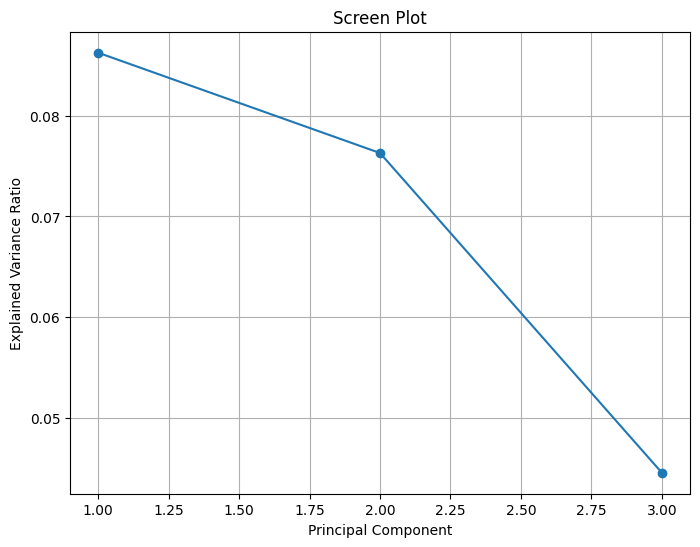

In [ ]:
# prompt: screen plot it

import matplotlib.pyplot as plt

# Assuming 'pca_df' is your DataFrame with PCA components ('PC1', 'PC2', 'PC3')

# Screen plot
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Screen Plot')
plt.grid(True)
plt.show()

In [ ]:
sum(pca.explained_variance_ratio_[:3])*100

20.71005736120551

In [ ]:
pca = PCA(n_components=20)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_df)
sum(pca.explained_variance_ratio_[:20])*100

32.411968924791424

In [ ]:
pca = PCA(n_components=7)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_df)
sum(pca.explained_variance_ratio_[:20])*100

26.49791370987873

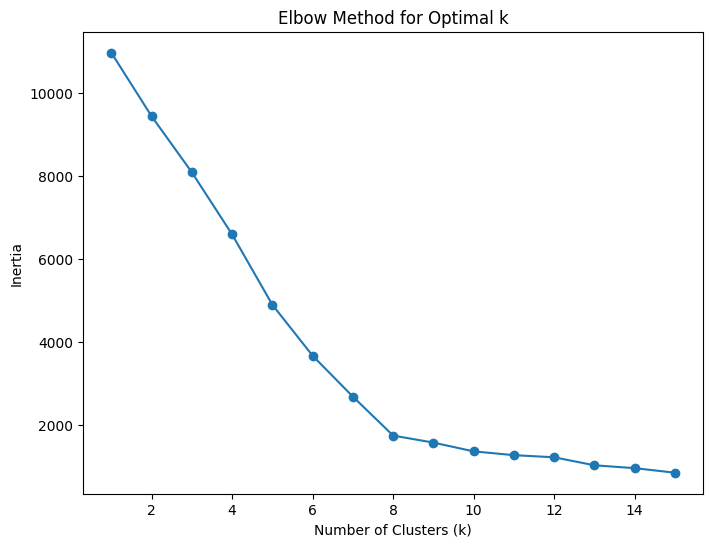

In [ ]:
# prompt: use kmeans clustering and elbow bethod to find optimal numbers of clusters
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'pca_df' is your DataFrame with the principal components (from previous code)
# If not, load your DataFrame and create pca_df as shown in the previous code

pca = PCA(n_components=7)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_df)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_result)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 16):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

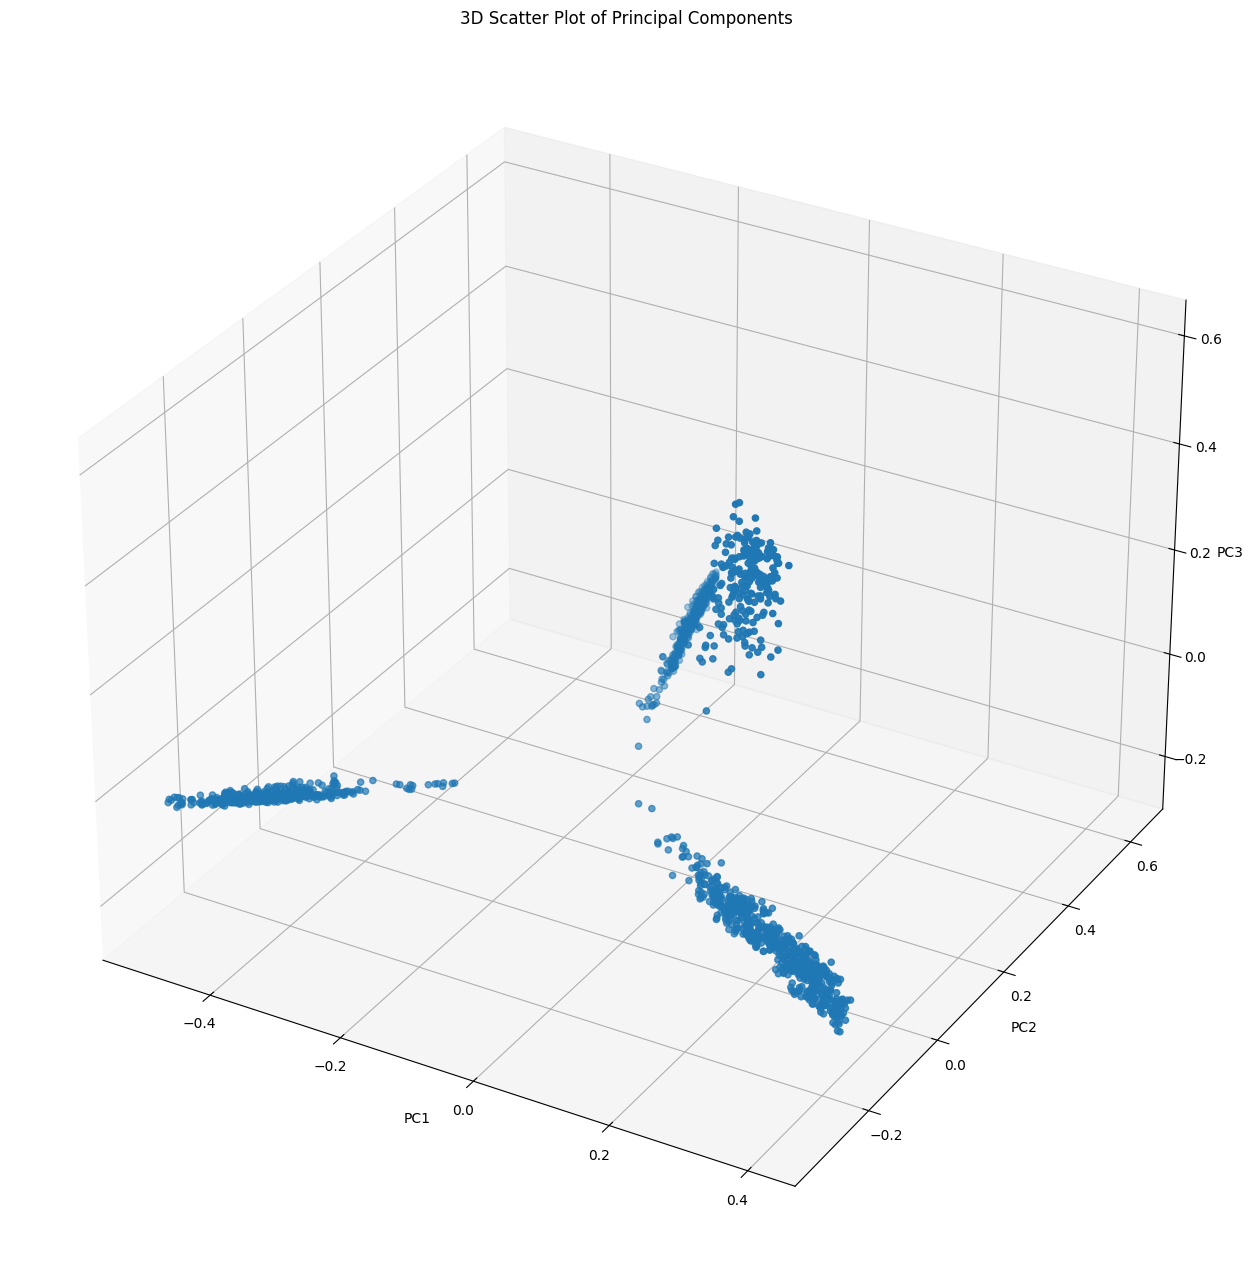

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pca_df is already created as in the previous code
# Create the 3D scatter plot
plt.figure(figsize=(20, 16))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot of Principal Components')
plt.show()

In [ ]:
# prompt:  Create the 3D scatter plot using Plotly with different color for language

import plotly.express as px

# Assuming pca_df and df_sheets are already defined from the previous code

# Create a combined DataFrame for plotting
plot_df = pd.concat([pca_df, df_sheets['language']], axis=1)

# Create the 3D scatter plot using Plotly Express
fig = px.scatter_3d(plot_df, x='PC1', y='PC2', z='PC3', color='language', title='3D Scatter Plot of Principal Components by Language')
fig.show()

In [ ]:
# prompt: Create a frequency-based ranking system to highlight the most common issue using queue column

import pandas as pd

# Assuming df_sheets is your DataFrame from the previous code
if 'queue' in df_sheets.columns:
    queue_counts = df_sheets['queue'].value_counts()
    print(queue_counts)

    # Create a ranking based on frequency
    queue_ranking = queue_counts.rank(ascending=False, method='dense') # dense ranking to handle ties

    # Add the ranking to the DataFrame
    df_sheets['queue_rank'] = df_sheets['queue'].map(queue_ranking)

    # Show the updated DataFrame
    print(df_sheets[['queue', 'queue_rank']].head())
else:
    print("Column 'queue' not found in the DataFrame.")

queue
Technical Support                  589
Product Support                    288
Customer Service                   234
IT Support                         179
Billing and Payments               117
Sales and Pre-Sales                 49
Returns and Exchanges               44
Service Outages and Maintenance     44
General Inquiry                     13
Human Resources                      9
Name: count, dtype: int64
                 queue  queue_rank
0    Technical Support         1.0
1      Product Support         2.0
2    Technical Support         1.0
3  Sales and Pre-Sales         6.0
4    Technical Support         1.0


In [ ]:
# prompt: Employ clustering techniques (e.g., K-Means) or supervised learning to classify tickets into issue categories make use of columns, type,queue,and answer to extract the most recurring issue for english language

# Assuming df_sheets is your DataFrame and contains columns 'type', 'queue', 'answer', and 'language'
# and you've already performed the preprocessing steps (TF-IDF, PCA)

from sklearn.cluster import KMeans

# Filter for English language tickets
english_tickets = df_sheets[df_sheets['language'] == 'en']

if not english_tickets.empty:
    # Use the TF-IDF matrix (or PCA components) for clustering
    # Assuming 'tfidf_df' is the TF-IDF matrix from the previous code
    # If you used PCA components, use 'pca_result' instead of 'tfidf_df'
    kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
    kmeans.fit(tfidf_df.loc[english_tickets.index])  # Fit only to English tickets' data

    english_tickets['cluster'] = kmeans.labels_

    # Analyze clusters and identify recurring issues within each cluster
    for cluster_id in range(5):  # Iterate through each cluster
        cluster_tickets = english_tickets[english_tickets['cluster'] == cluster_id]

        # Analyze 'type', 'queue', and 'answer' columns within this cluster
        print(f"Cluster {cluster_id}:")
        print(cluster_tickets['type'].value_counts())  # Most frequent ticket types
        print(cluster_tickets['queue'].value_counts())  # Most frequent queues
        # Example: Find the most frequent words in 'answer'
        from collections import Counter
        words = ' '.join(cluster_tickets['answer']).split()
        word_counts = Counter(words)
        print(word_counts.most_common(10)) # Top 10 most frequent words


        print("-" * 20)
else:
    print("No English language tickets found.")

Cluster 0:
type
Incident    48
Problem     30
Request     13
Change       2
Name: count, dtype: int64
queue
Technical Support      44
Product Support        26
IT Support             11
Customer Service        7
Sales and Pre-Sales     3
Human Resources         2
Name: count, dtype: int64
[('the', 628), ('to', 350), ('for', 301), ('your', 277), ('and', 264), ('you', 187), ('a', 137), ('with', 124), ('or', 123), ('are', 112)]
--------------------
Cluster 1:
type
Incident    81
Request     18
Problem     16
Change       2
Name: count, dtype: int64
queue
Technical Support                  54
IT Support                         20
Billing and Payments               13
Service Outages and Maintenance    11
Product Support                    10
Customer Service                    8
Sales and Pre-Sales                 1
Name: count, dtype: int64
[('the', 568), ('to', 477), ('and', 453), ('your', 380), ('you', 363), ('We', 289), ('for', 268), ('will', 203), ('this', 193), ('Thank', 146)]
------

<ipython-input-22-c6bd9e1bcb32>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# prompt: for queue valueTechnical Support check the maximum type value which is most recurring and frequent

# Assuming df_sheets is your DataFrame and contains a 'queue' column
if 'queue' in df_sheets.columns:
    # Filter for 'Technical Support' queue
    technical_support_queue = df_sheets[df_sheets['queue'] == 'Technical Support']

    if not technical_support_queue.empty:
        # Find the most frequent 'type' value within the 'Technical Support' queue
        type_counts = technical_support_queue['type'].value_counts()
        most_frequent_type = type_counts.index[0]
        print(f"The most frequent 'type' for 'Technical Support' queue is: {most_frequent_type}")
    else:
        print("No tickets found for 'Technical Support' queue.")
else:
    print("Column 'queue' not found in the DataFrame.")

The most frequent 'type' for 'Technical Support' queue is: Incident


In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_data)

KMeans(random_state=42)

In [ ]:
df_sheets["answer_label"] = kmeans.labels_

In [ ]:
df_sheets.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,queue_rank,answer_label
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,,1.0,1
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,,2.0,6
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,,1.0,5
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,,6.0,0
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,,1.0,2


In [ ]:
df_sheets["answer_label"].value_counts()

,count
answer_label,
4,256
2,228
3,222
0,212
1,194
5,185
6,145
7,124


In [ ]:
df_sheets["queue_rank"].value_counts()

,count
queue_rank,
1.0,589
2.0,288
3.0,234
4.0,179
5.0,117
7.0,88
6.0,49
8.0,13
9.0,9


In [ ]:
# prompt: make all possible combinations of values from these columns: ["type", "queue", "priority", "language", "business_type", "answer_label"]

import itertools

# Assuming df_sheets is your DataFrame and contains the specified columns
columns_to_combine = ["type", "queue", "priority", "language", "business_type", "answer_label"]

# Extract unique values for each column
unique_values = {}
for col in columns_to_combine:
    if col in df_sheets.columns:
        unique_values[col] = df_sheets[col].unique()
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping.")
        unique_values[col] = [None]  # Handle missing columns gracefully

# Generate all possible combinations
all_combinations = list(itertools.product(*unique_values.values()))

# Convert combinations to a DataFrame (optional)
combinations_df = pd.DataFrame(all_combinations, columns=columns_to_combine)

# Print or use the combinations as needed
combinations_df

,type,queue,priority,language,business_type,answer_label
0,Incident,Technical Support,high,en,IT Services,1
1,Incident,Technical Support,high,en,IT Services,6
2,Incident,Technical Support,high,en,IT Services,5
3,Incident,Technical Support,high,en,IT Services,0
4,Incident,Technical Support,high,en,IT Services,2
...,...,...,...,...,...,...
23995,Change,General Inquiry,medium,fr,IT Consulting Service,0
23996,Change,General Inquiry,medium,fr,IT Consulting Service,2
23997,Change,General Inquiry,medium,fr,IT Consulting Service,4
23998,Change,General Inquiry,medium,fr,IT Consulting Service,3


In [ ]:
# prompt: for these combinations get total rows present in dataset for each combo, and remove all combos with 0 rows

# Assuming df_sheets is your DataFrame and contains the specified columns
columns_to_combine = ["type", "queue", "priority", "language", "business_type", "answer_label"]

# Extract unique values for each column
unique_values = {}
for col in columns_to_combine:
    if col in df_sheets.columns:
        unique_values[col] = df_sheets[col].unique()
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame. Skipping.")
        unique_values[col] = [None]  # Handle missing columns gracefully

# Generate all possible combinations
all_combinations = list(itertools.product(*unique_values.values()))

# Convert combinations to a DataFrame
combinations_df = pd.DataFrame(all_combinations, columns=columns_to_combine)

# Group by combinations and count rows
combo_counts = df_sheets.groupby(columns_to_combine).size().reset_index(name='row_count')

# Merge with combinations_df to get all combinations and their counts (or 0 if no rows)
combinations_df = pd.merge(combinations_df, combo_counts, on=columns_to_combine, how='left').fillna(0)


# Remove combinations with 0 rows
combinations_df = combinations_df[combinations_df['row_count'] > 0]

combinations_df

,type,queue,priority,language,business_type,answer_label,row_count
0,Incident,Technical Support,high,en,IT Services,1,20.0
1,Incident,Technical Support,high,en,IT Services,6,8.0
9,Incident,Technical Support,high,en,Tech Online Store,6,3.0
16,Incident,Technical Support,high,en,IT Consulting Firm,1,14.0
17,Incident,Technical Support,high,en,IT Consulting Firm,6,2.0
...,...,...,...,...,...,...,...
21782,Change,Customer Service,high,fr,IT Consulting Firm,3,1.0
22200,Change,Service Outages and Maintenance,high,en,IT Services,1,1.0
22243,Change,Service Outages and Maintenance,high,de,IT Services,0,1.0
22284,Change,Service Outages and Maintenance,high,pt,IT Services,2,1.0


In [ ]:
combinations_df.sort_values(by="row_count", ascending=False)

,type,queue,priority,language,business_type,answer_label,row_count
43,Incident,Technical Support,high,de,IT Services,0,27.0
125,Incident,Technical Support,high,es,IT Services,4,26.0
0,Incident,Technical Support,high,en,IT Services,1,20.0
166,Incident,Technical Support,high,fr,IT Services,3,18.0
84,Incident,Technical Support,high,pt,IT Services,2,17.0
...,...,...,...,...,...,...,...
12824,Problem,Product Support,low,en,Software Development Company,1,1.0
12867,Problem,Product Support,low,de,Software Development Company,0,1.0
12990,Problem,Product Support,low,fr,Software Development Company,3,1.0
13000,Problem,Product Support,medium,en,IT Services,1,1.0


In [ ]:
df_sheets.loc[
    df_sheets["type"].eq("Incident") & \
    df_sheets["queue"].eq("Technical Support") & \
    df_sheets["priority"].eq("high") & \
    df_sheets["language"].eq("en") & \
    df_sheets["business_type"].eq("IT Services") & \
    df_sheets["answer_label"].eq(1), "answer"].values

array(["Subject: Re: Urgent: Critical impact on enterprise network connectivity\n\n\nDear <name>,\n\n\nThank you for reaching out to us regarding the critical outage affecting your Cisco Router ISR4331.\n\n\nWe understand the urgency and impact of this issue on your operations. Our technical support team is prioritizing your case and will promptly begin diagnosing the problem to facilitate a quick resolution.\n\n\nPlease ensure all relevant technical logs are available for our team to access, which will assist in expediting the diagnostic process. We will maintain close communication and provide updates as our investigation proceeds.\n\n\nYour patience and cooperation are greatly appreciated, and we're committed to resolving this matter as swiftly as possible.\n\n\nBest regards,\n\n\nCustomer Support Team",
       'Hello <name>,\n\n\nWe appreciate you informing us about the AWS downtime issue. We recognize the urgent nature of this matter and will give it high priority for immediate as

In [ ]:
def classify_and_respond(issue_details, predefined_issues):
    """
    Classify an incoming issue, match it to a predefined category,
    and generate an automated response.

    Args:
        issue_details (dict): A dictionary containing the incoming issue details
                              (e.g., type, queue, priority, etc.).
        predefined_issues (list): A list of dictionaries, each representing a predefined
                                  issue category and its response details.

    Returns:
        str: An automated response if a match is found, or a message indicating no match.
    """

    def generate_issue_template(issue_params):
        """
        Generate a response template based on the provided issue parameters.
        """
        template = (
            f"Subject: Re: Urgent: {issue_params.get('specific_issue', '<specific_issue>')}\n\n"
            f"Dear {issue_params.get('customer_name', '<name>')},\n\n"
            f"Thank you for reaching out regarding the issue: {issue_params.get('specific_issue', '<specific_issue>')}.\n"
            "We understand the urgency and are taking steps to resolve this.\n\n"
            "Resolution Steps:\n"
            f"{issue_params.get('resolution_steps', '<resolution_steps>')}\n\n"
            "For further assistance, please contact us at "
            f"{issue_params.get('email', '<email>')} or {issue_params.get('phone_number', '<phone_number>')}.\n\n"
            "Best regards,\n"
            f"{issue_params.get('team_name', 'Customer Support Team')}"
        )
        return template

    # Iterate through the predefined issues to find a match
    for predefined in predefined_issues:
        match = True
       # print(f"Checking issue: {predefined['specific_issue']}")  # Debugging: Show which issue we're checking

        for key, value in predefined.items():
            if key != "response_template":  # Skip response_template as it's not a part of matching
                # If key is present in incoming_issue, compare it, otherwise skip
                if key in issue_details:
                    # Debugging: Show the comparison details
                   # print(f"Comparing: {key} => {issue_details.get(key)} vs {value}")

                    # Check if the value matches exactly
                    if str(issue_details[key]).strip() != str(value).strip():
                      #  print(f"Mismatch found for {key}")  # Debugging: Mismatch point
                        match = False
                        break
                else:
                    # If incoming issue doesn't contain this key, it's not a match
                    #print(f"Key {key} missing in incoming issue")  # Debugging: Key missing
                    match = False
                    break

        if match:
            # Generate the response if a match is found
            #print(f"Match found for {predefined['specific_issue']}")  # Debugging: Match found
            response = generate_issue_template(predefined)
            return response

    return "No matching issue category found for automation."


# Example Usage

# Predefined issues (saved in a dictionary or database)
predefined_issues = [
    {
        "type": "Incident",
        "queue": "Technical Support",
        "priority": "high",
        "language": "en",
        "business_type": "IT Services",
        "answer_label": 1,
        "specific_issue": "AWS Management Service Downtime",
        "resolution_steps": (
            "- Analyze error logs for root cause analysis.\n"
            "- Engage AWS support for collaborative resolution.\n"
            "- Verify data integrity post-resolution."
        ),
        "customer_name": "John Doe",
        "email": "support@example.com",
        "phone_number": "+1-800-555-1234",
        "team_name": "Tech Solutions Team"
    },
    {
        "type": "Incident",
        "queue": "Product Support",
        "priority": "high",
        "language": "en",
        "business_type": "E-commerce",
        "answer_label": 1,
        "specific_issue": "Invoice Reconciliation",
        "resolution_steps": (
            "- Identify discrepancies in the billing system.\n"
            "- Provide the corrected invoice copy.\n"
            "- Ensure future billing accuracy."
        ),
        "customer_name": "Jane Smith",
        "email": "billing@example.com",
        "phone_number": "+1-800-555-5678",
        "team_name": "Product Support Team"
    },
]

# Incoming issue details (only some keys to test partial matching)
incoming_issue = {
    "type": "Incident",
    "queue": "Technical Support",
    "priority": "high",
    "language": "en",
    "business_type": "IT Services",
    "answer_label": 1,
    "specific_issue": "AWS Management Service Downtime",
    "resolution_steps": (
        "- Analyze error logs for root cause analysis.\n"
        "- Engage AWS support for collaborative resolution.\n"
        "- Verify data integrity post-resolution."
    ),
        "customer_name": "John Doe",
        "email": "support@example.com",
        "phone_number": "+1-800-555-1234",
        "team_name": "Tech Solutions Team"
}

# Generate response
response = classify_and_respond(incoming_issue, predefined_issues)
print(response)



Subject: Re: Urgent: AWS Management Service Downtime

Dear John Doe,

Thank you for reaching out regarding the issue: AWS Management Service Downtime.
We understand the urgency and are taking steps to resolve this.

Resolution Steps:
- Analyze error logs for root cause analysis.
- Engage AWS support for collaborative resolution.
- Verify data integrity post-resolution.

For further assistance, please contact us at support@example.com or +1-800-555-1234.

Best regards,
Tech Solutions Team
